In [102]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from time import time
import matplotlib.pyplot as plt

# 一、資料準備

In [103]:
# 讀取原始資料
titanic_raw_data = pd.read_excel("./data/titanic.xls")

In [104]:
titanic_raw_data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C


In [105]:
titanic_raw_data.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S


In [106]:
titanic_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
cabin       295 non-null object
embarked    1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [107]:
titanic_raw_data['survived'] = titanic_raw_data['survived'].apply(lambda x:"生存" if x ==1 else"掛掉啦")

<h1>欄位說明：</h1>
<p>參考資料：　Titanic: Machine Learning from Disaster 
   <a href="https://www.kaggle.com/c/titanic/data"> https://www.kaggle.com/c/titanic/data</a></p>

<table>
  <tbody>
    <tr>
      <th><b>變數</b></th>
      <th><b>定義</b></th>
      <th><b>說明</b></th>
    </tr>
    <tr>
      <td>survival</td>
      <td>是否生存</td>
      <td>0 = No, 1 = Yes</td>
    </tr>
    <tr>
      <td>pclass</td>
      <td>艙位等級</td>
      <td>1 = 頭等艙, 2 = 二等艙, 3 = 三等艙</td>
    </tr>
    <tr>
      <td>sex</td>
      <td>性別</td>
      <td></td>
    </tr>
    <tr>
      <td>Age</td>
      <td>年紀</td>
      <td></td>
    </tr>
    <tr>
      <td>sibsp</td>
      <td>兄弟姊妹或配偶也在船上的數量</td>
      <td></td>
    </tr>
    <tr>
      <td>parch</td>
      <td>雙親或子女也在船上的數量</td>
      <td></td>
    </tr>
    <tr>
      <td>ticket</td>
      <td>船票編號</td>
      <td></td>
    </tr>
    <tr>
      <td>fare</td>
      <td>船票費用</td>
      <td></td>
    </tr>
    <tr>
      <td>cabin</td>
      <td>艙位號碼</td>
      <td></td>
    </tr>
    <tr>
      <td>embarked</td>
      <td>登船港口</td>
      <td>C = Cherbourg　瑟堡港, Q = Queenstown　皇后鎮, S = Southampton　南安普敦港</td>
    </tr>
  </tbody>
</table>


In [108]:
# 我們想探討的欄位
cols = ['survived', 
        'pclass',
        'sex', 
        'age', 
        'sibsp',
        'parch',
        'fare',
        'embarked']
analysis_data = titanic_raw_data[cols]

In [109]:
## 資料的敘述性統計

analysis_data.describe()

,pclass,age,sibsp,parch,fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479
std,0.837836,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [110]:
my_data = pd.DataFrame([{
    'pclass': 1,
    'sex':  'female',
    'age':  50,
    'sibsp':  0,
    'parch':  0,
    'fare':  20,
    'embarked': 'Q' 
}])

In [111]:
my_data

,age,embarked,fare,parch,pclass,sex,sibsp
0,50,Q,20,0,1,female,0


## 資料分割

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
# 把資料分 80% 作為訓練資料

train_data, test_data = train_test_split(analysis_data, test_size = 0.2)

In [114]:
print('原始資料長度:          %s \n訓練（Train）資料長度: %s \n測試（Test）資料長度:   %s \n'%(
    analysis_data.shape,
    train_data.shape,
    test_data.shape
))

原始資料長度:          (1309, 8) 
訓練（Train）資料長度: (1047, 8) 
測試（Test）資料長度:   (262, 8) 



# 二、資料前處理

## 遺漏值處理

In [115]:
print("訓練資料的遺漏值個數:\n\n", train_data.isna().sum())
print("---------------------------")
print("測試資料的遺漏值個數:\n\n", test_data.isna().sum())

訓練資料的遺漏值個數:

 survived      0
pclass        0
sex           0
age         210
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64
---------------------------
測試資料的遺漏值個數:

 survived     0
pclass       0
sex          0
age         53
sibsp        0
parch        0
fare         0
embarked     0
dtype: int64


## 我們把 age跟 fare 的遺漏值補上，訓練資料的平均

In [116]:
age_mean = train_data['age'].mean() 
fare_mean = train_data['fare'].mean()

In [117]:

# 補齊遺漏值
train_data_fillna = train_data.fillna(
    value={
    'age': age_mean,
    'fare': fare_mean}
)

# 測試資料，的遺漏值補訓練資料的參數
test_data_fillna = test_data.fillna(
    value={
    'age': age_mean,
    'fare': fare_mean}
)

# 由於”登船港口“的遺漏值我們目前無法處理，故先排除embarked有空的
train_data_fillna = train_data_fillna.dropna()
test_data_fillna = test_data_fillna.dropna()

In [118]:
print('訓練資料 => ')
print("在排除遺漏值之前的維度：", train_data.shape)
print("在排除遺漏值之後的維度：", train_data_fillna.shape)
print()
print('測試資料 => ')
print("在排除遺漏值之前的維度：", test_data.shape)
print("在排除遺漏值之後的維度：", test_data_fillna.shape)

訓練資料 => 
在排除遺漏值之前的維度： (1047, 8)
在排除遺漏值之後的維度： (1045, 8)

測試資料 => 
在排除遺漏值之前的維度： (262, 8)
在排除遺漏值之後的維度： (262, 8)


## 特徵與標籤分割

In [119]:
y_train = train_data_fillna['survived'] 
X_train = train_data_fillna.drop('survived', axis=1)

y_test = test_data_fillna['survived']
X_test = test_data_fillna.drop('survived', axis=1)

## 資料型態轉換

In [120]:
train_data_fillna.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
1288,掛掉啦,3,male,18.000000,1,0,6.4958,S
747,掛掉啦,3,male,0.333300,0,2,14.4000,S
1305,掛掉啦,3,female,29.757467,1,0,14.4542,C
713,掛掉啦,3,male,21.000000,0,0,7.7333,Q
1026,生存,3,female,27.000000,0,1,12.4750,S


## 2.1 類別資料

In [121]:
class OneHotEncoder:
    def __init__(self, dropNa= True):
        self.dropNa = dropNa
    def fit(self, dataset):
        if self.dropNa:
            handle_data = dataset.dropna()
        else:
            handle_data = dataset
        self.category_name = dataset.name
        self.category_list = handle_data.drop_duplicates().values 

    def transform(self, dataset):
        def trans_one_hot(val):
            row = [0 for _ in range(len(self.category_list))]
            if pd.isna(val):
                row[np.where(pd.isna(self.category_list))[0][0]] = 1
            else:
                row[np.where(self.category_list == val)[0][0]] = 1
            return row
        if self.dropNa:
            handle_data = dataset.dropna()
        else:
            handle_data = dataset
        return pd.DataFrame([trans_one_hot(item) for item in handle_data]
                                         , columns=[
                                             "%s_%s"%(self.category_name, c_type) for c_type in self.category_list
                                         ])            

In [122]:
embarked_one_hot_encoder = OneHotEncoder()

## 讓模型先調適 embarked 的 one hot
embarked_one_hot_encoder.fit( analysis_data['embarked'])

In [123]:
embarked_one_hot_encoder.transform(X_train['embarked'])

,embarked_S,embarked_C,embarked_Q
0,1,0,0
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0
5,0,1,0
6,1,0,0
7,0,1,0
8,1,0,0
9,1,0,0


In [124]:
# 類別資料 -> 種類2種：1,0  種類超過2個：one hot encoding

# sex: female -> 0, male -> 1
train_sex = X_train['sex'].map({'female':0, 'male': 1}).astype(int).values.reshape(-1, 1)


train_embarked_one_hot = embarked_one_hot_encoder.transform(X_train['embarked']).values


# 另一種 one hot 的用法，但為什麼我們不用呢？
# pd.get_dummies(data=train_x,columns=["embarked"]) 

## 2.2 數值資料 -> 常態標準化

In [125]:
X_train_numerical = X_train[
    [col for col in X_train.columns if not(
        ("sex" in col) or ("embarked" in col))]
].values

# 用 訓練資料中的“數值資料”來調適標準化參數
numerical_standard_scaler = preprocessing.StandardScaler()
numerical_standard_scaler.fit( X_train_numerical )

X_train_numerical_standard = numerical_standard_scaler.transform(
    X_train_numerical
)

# 最後把數值資料與類別資料水平合併
X_train_standard = np.hstack((X_train_numerical_standard,
                              train_sex,
                              train_embarked_one_hot))

In [126]:
X_train_standard[0]

array([ 0.85606501, -0.90969857,  0.50909141, -0.45493113, -0.5110509 ,
        1.        ,  1.        ,  0.        ,  0.        ])

In [127]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked
1288,3,male,18.000000,1,0,6.4958,S
747,3,male,0.333300,0,2,14.4000,S
1305,3,female,29.757467,1,0,14.4542,C
713,3,male,21.000000,0,0,7.7333,Q
1026,3,female,27.000000,0,1,12.4750,S


## 同樣處理測試資料 ( test x )

In [128]:
test_sex = X_test['sex'].map({'female':0, 'male': 1}).astype(int).values.reshape(-1, 1)

test_embarked_one_hot = embarked_one_hot_encoder.transform(X_test['embarked']).values

X_test_numerical = X_test[
    [col for col in X_test.columns if not(("sex" in col) or ("embarked" in col))]
].values


# 注意！！！  要常態標準化的話，要用訓練資料所調適出來的 Scaler標準化參數來轉換
X_test_numerical_standard = numerical_standard_scaler.transform(X_test_numerical)

# 最後把類別資料與數值資料水平合併
X_test_standard = np.hstack((X_test_numerical_standard, test_sex, test_embarked_one_hot))

## 將Y的輸出結果做 one hot

In [129]:
y_one_hot_encoder = OneHotEncoder()
y_one_hot_encoder.fit(y_train)

y_train_one_hot = y_one_hot_encoder.transform(y_train)
y_test_one_hot = y_one_hot_encoder.transform(y_test)

# 三、用 Keras 建立 MLP模型

https://keras.io/

In [130]:
from tensorflow import keras

## 神經網絡層

In [131]:
model = keras.Sequential (
    [keras.layers.Dense(input_dim= X_train_standard.shape[1],
                        units=40,
                        kernel_initializer='normal',
                        activation= 'relu'
                        ),
     keras.layers.Dense(units=30,
                        kernel_initializer='normal',
                        activation= 'sigmoid'),
     keras.layers.Dense(units=2,
                        kernel_initializer='normal', 
                        activation= 'softmax')
    ]
)

In [132]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 40)                400       
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 62        
Total params: 1,692
Trainable params: 1,692
Non-trainable params: 0
_________________________________________________________________


## 定義訓練方式

In [133]:
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy']
             )## 定義訓練方式

## 開始訓練模型

In [134]:
training_history = model.fit(x = X_train_standard,
                             y = y_train_one_hot.values,
                             batch_size = 20,
                             epochs = 50,
                             validation_data =( X_test_standard,
                                                y_test_one_hot.values)
                             )

Train on 1045 samples, validate on 262 samples
Epoch 1/50
1045/1045 [==============================] - 0s 174us/sample - loss: 0.6651 - acc: 0.6163 - val_loss: 0.6457 - val_acc: 0.6298
Epoch 2/50
1045/1045 [==============================] - 0s 44us/sample - loss: 0.6352 - acc: 0.6201 - val_loss: 0.5960 - val_acc: 0.6603
Epoch 3/50
1045/1045 [==============================] - 0s 44us/sample - loss: 0.5770 - acc: 0.7033 - val_loss: 0.5300 - val_acc: 0.7710
Epoch 4/50
1045/1045 [==============================] - 0s 43us/sample - loss: 0.5246 - acc: 0.7426 - val_loss: 0.4855 - val_acc: 0.8053
Epoch 5/50
1045/1045 [==============================] - 0s 43us/sample - loss: 0.4854 - acc: 0.7789 - val_loss: 0.4571 - val_acc: 0.8015
Epoch 6/50
1045/1045 [==============================] - 0s 45us/sample - loss: 0.4642 - acc: 0.7943 - val_loss: 0.4482 - val_acc: 0.8053
Epoch 7/50
1045/1045 [==============================] - 0s 45us/sample - loss: 0.4554 - acc: 0.7981 - val_loss: 0.4481 - val_acc: 

## 訓練結果

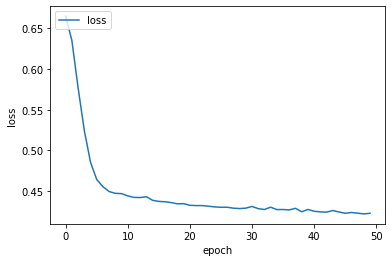

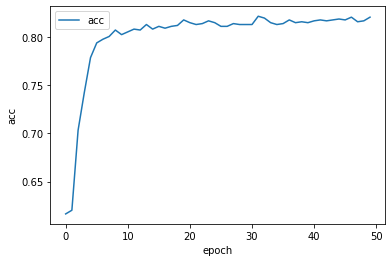

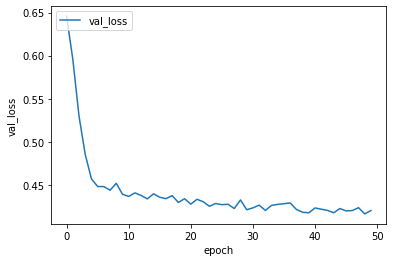

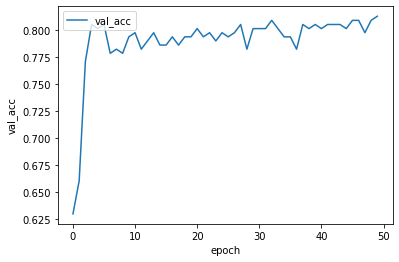

In [135]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

for training_key in training_history.history.keys():
    plt.plot(training_history.history[training_key], label = training_key)
    plt.ylabel(training_key)
    plt.xlabel('epoch')
    plt.legend([training_key], loc='upper left')
    plt.show()

# 四、模型評估

# 來看看Jack & Rose

In [136]:
cols

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

In [137]:
# 第一筆是 'Jack'
# 第二筆是 'Rose'
JackAndRose = pd.DataFrame([[0, 3, 'male', 23, 1, 0,  5.0000, 'S'],
                            [1, 1, 'female', 20, 1, 0, 100.0000, 'S']], columns=cols)

In [138]:
JackAndRose

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,23,1,0,5.0,S
1,1,1,female,20,1,0,100.0,S


In [139]:
JackAndRose_y = JackAndRose['survived']
JackAndRose_x = JackAndRose.drop('survived', axis=1)

In [140]:
JackAndRose_sex = JackAndRose_x['sex'].map({'female':0, 'male': 1}).astype(int).values.reshape(-1, 1)
JackAndRose_embarked_one_hot = embarked_one_hot_encoder.transform(JackAndRose_x['embarked']).values


numerical_JackAndRose_x_data   = JackAndRose_x[[col for col in JackAndRose_x.columns if not(("sex" in col) or ("embarked" in col))]].values


# 注意！！！  要常態標準化的話，要用訓練資料所調適出來的 Scaler標準化參數來轉換
standard_numerical_JackAndRose_x_data = numerical_standard_scaler.transform(numerical_JackAndRose_x_data)

# 最後把類別資料與數值資料水平合併
standard_JackAndRose_x_data = np.hstack((standard_numerical_JackAndRose_x_data, JackAndRose_sex, JackAndRose_embarked_one_hot))

In [141]:
standard_JackAndRose_x_data

array([[ 0.85606501, -0.5215597 ,  0.50909141, -0.45493113, -0.53941796,
         1.        ,  1.        ,  0.        ,  0.        ],
       [-1.53588134, -0.75444302,  0.50909141, -0.45493113,  1.26220703,
         0.        ,  1.        ,  0.        ,  0.        ]])

# 預測Jack & Rose 的生存

In [142]:
# 第一筆是 'Jack'
# 第二筆是 'Rose'
model.predict(standard_JackAndRose_x_data)

array([[0.87416434, 0.12583561],
       [0.02406399, 0.975936  ]], dtype=float32)

In [143]:
y_one_hot_encoder.category_list

array(['掛掉啦', '生存'], dtype=object)

# 我們來測試自己的資料

In [144]:
my_data_sex = my_data['sex'].map({'female':0, 'male': 1}).astype(int).values.reshape(-1, 1)
my_data_embarked_one_hot = embarked_one_hot_encoder.transform(my_data['embarked']).values


numerical_my_data_x_data   = my_data[[col for col in my_data.columns if not(("sex" in col) or ("embarked" in col))]].values


# 注意！！！  要常態標準化的話，要用訓練資料所調適出來的 Scaler標準化參數來轉換
standard_numerical_my_data = numerical_standard_scaler.transform(numerical_my_data_x_data)

# 最後把類別資料與數值資料水平合併
standard_my_data = np.hstack((standard_numerical_my_data, my_data_sex, my_data_embarked_one_hot))



In [145]:
my_data

,age,embarked,fare,parch,pclass,sex,sibsp
0,50,Q,20,0,1,female,0


In [146]:
model.predict(standard_my_data)

array([[0.959153  , 0.04084706]], dtype=float32)

# 測試專區

# 1. 遺漏值（Missing Data）處理

In [147]:
temp = pd.DataFrame([[1,3, 6],
                    [8,3,31],
                    [2, None,31],
                    [np.nan,25, -5],
                    [np.nan,3, 6],
                    [12,3, 63],])
temp

,0,1,2
0,1.0,3.0,6
1,8.0,3.0,31
2,2.0,NaN,31
3,NaN,25.0,-5
4,NaN,3.0,6
5,12.0,3.0,63


In [148]:
## dataframe 用 .isna() 查詢遺漏值
temp.isna()

,0,1,2
0,False,False,False
1,False,False,False
2,False,True,False
3,True,False,False
4,True,False,False
5,False,False,False


In [149]:
## 每一個直欄的遺漏值個數
temp.isna().sum()

0    2
1    1
2    0
dtype: int64

## 1.1 填滿遺漏值

* 填入特定值

In [150]:
temp.fillna("*")

,0,1,2
0,1,3,6
1,8,3,31
2,2,*,31
3,*,25,-5
4,*,3,6
5,12,3,63


* 特定的欄位填入特定值

In [151]:
temp.fillna({0:"@", 1:999})

,0,1,2
0,1,3.0,6
1,8,3.0,31
2,2,999.0,31
3,@,25.0,-5
4,@,3.0,6
5,12,3.0,63


* 根據後面非nan的值填入

In [152]:
temp.bfill()

,0,1,2
0,1.0,3.0,6
1,8.0,3.0,31
2,2.0,25.0,31
3,12.0,25.0,-5
4,12.0,3.0,6
5,12.0,3.0,63


* 根據前面非nan的值填入

In [153]:
temp.ffill()

,0,1,2
0,1.0,3.0,6
1,8.0,3.0,31
2,2.0,3.0,31
3,2.0,25.0,-5
4,2.0,3.0,6
5,12.0,3.0,63


## 1.2 移除遺漏值

* 預設是只要哪裡有Nan，那個row就移除

In [154]:
temp.dropna()

,0,1,2
0,1.0,3.0,6
1,8.0,3.0,31
5,12.0,3.0,63


* 移除有Nan的columns

In [155]:
temp.dropna(axis=1)

,2
0,6
1,31
2,31
3,-5
4,6
5,63


* 指定columns

In [156]:
temp.dropna(subset=[1])

,0,1,2
0,1.0,3.0,6
1,8.0,3.0,31
3,NaN,25.0,-5
4,NaN,3.0,6
5,12.0,3.0,63


# 2. Softmax

$P(y=j|\theta^i)=\frac{e^{\theta^i}}{\sum_{j=0}^{k}
e^{\theta_j^i}}$

In [157]:
output_values = np.array([2.2, 2.3, 5.0, 5.5])

In [158]:
sum_output_exp_values = np.exp(output_values).sum()

In [159]:
for the_value in output_values:
    print(the_value, "%=>", np.exp(the_value)/sum_output_exp_values)

2.2 %=> 0.021899829186691457
2.3 %=> 0.024203054327955654
5.0 %=> 0.36013495532250256
5.5 %=> 0.5937621611628503


# 3. 用 pd.get_dummies 來做 one hot encoding

In [ ]:
pd.get_dummies(data= X_train, columns=["embarked"]) 

In [ ]:
pd.get_dummies(data=JackAndRose, columns=["embarked"]) 